DATA PREPARATION

In [ ]:
# Import library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Visualization
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Import Dataset
dataset = pd.read_excel('https://github.com/mirzayusuf/mirzayusuf/blob/main/%232.xlsx?raw=true', sheet_name = "consumer")
dataset

,Year,Code,Company Name,Current assets,Fixed Assets,Total Assets,Current Liabilites,Long-Term Liabilities,Total Liabilities,Total Equity,...,ROA,ROE,NPM,GPM,DY,DPR,PER,PBV,Industri,Klasifikasi
0,2018,ADES,Akasha Wira International Tbk,364138000000,447249000000,881275000000,262397000000,136964000000,399361000000,481914000000,...,0.066838,0.122227,0.073235,0.483761,0.000000,0.000000,35.852682,4.382173,3,0
1,2019,ADES,Akasha Wira International Tbk,351120000000,405448000000,822375000000,175191000000,79247000000,254438000000,567937000000,...,0.104603,0.151466,0.103104,0.499861,0.000000,0.000000,28.664062,4.341623,3,0
2,2020,ADES,Akasha Wira International Tbk,545239000000,351626000000,958791000000,183559000000,74724000000,258283000000,700508000000,...,0.141600,0.193809,0.201622,0.508737,0.000000,0.000000,25.374709,4.917856,3,0
3,2018,TCID,Mandom Indonesia Tbk,1333428311186,998708967039,2445143511801,231533842787,241146503875,472680346662,1972463165139,...,0.070773,0.087733,0.065332,0.363553,0.005954,0.475946,79.938927,7.013255,3,0
4,2019,TCID,Mandom Indonesia Tbk,1428191709308,938300134590,2551192620939,260244280265,271804523512,532048803777,2019143817162,...,0.056895,0.071887,0.051762,0.331727,0.009569,0.583216,60.950557,4.381527,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2019,STTP,Siantar Top Tbk,1165406301686,1124520287704,2881563083954,408490550651,325065525323,733556075974,2148007007980,...,0.167475,0.224669,0.137392,0.271325,0.000000,0.000000,12.215325,2.744404,3,0
113,2020,STTP,Siantar Top Tbk,1505872822478,1538988540784,3448995059882,626131203549,149565657189,775696860738,2673298199144,...,0.182264,0.235151,0.163437,0.278241,0.000000,0.000000,19.797054,4.655298,3,0
114,2018,CEKA,Wilmar Cahaya Indonesia Tbk,809166450672,200024117988,1168956042706,158255592250,34052874614,192308466864,976647575842,...,0.079258,0.094865,0.025528,0.075593,0.032650,0.288305,8.830308,0.837687,3,0
115,2019,CEKA,Wilmar Cahaya Indonesia Tbk,1067652078121,195283411192,1393079542074,222440530626,39344314614,261784845240,1131294696834,...,0.154664,0.190454,0.069037,0.117068,0.059788,0.275730,4.611778,0.878330,3,0


In [ ]:
#total rows and colums in the dataset
dataset.shape

(117, 29)

In [ ]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        117 non-null    int64  
 1   Code                        117 non-null    object 
 2   Company Name                117 non-null    object 
 3   Current assets              117 non-null    int64  
 4    Fixed Assets               117 non-null    int64  
 5    Total Assets               117 non-null    int64  
 6   Current Liabilites          117 non-null    int64  
 7    Long-Term Liabilities      117 non-null    int64  
 8    Total Liabilities          117 non-null    int64  
 9    Total Equity               117 non-null    int64  
 10   Total outstanding shares   117 non-null    int64  
 11   Total Sales/ Revenue       117 non-null    int64  
 12   COGS/ Cost of Revenues     117 non-null    int64  
 13   Expenses (Income)          117 non

In [ ]:
# remove all of the column except ROA, ROE, and Industry
dataset.drop(dataset.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 23, 24, 25, 26, 28]], axis = 1, inplace = True)

In [ ]:
# Checking if there are missing value in the data
dataset.isnull().sum()

ROA         0
ROE         0
NPM         0
GPM         0
Industri    0
dtype: int64

In [ ]:
# standarization data for PCA for ROA and ROE
scaler = StandardScaler()
scaler.fit(dataset.iloc[:, :-1])
dataset_scaled = scaler.transform(dataset.iloc[:, :-1])
dataset_scaled

array([[-8.58529937e-02, -4.54327128e-02, -2.78037785e-02,
         1.12194381e+00],
       [ 1.96092270e-01,  3.04173325e-02,  1.45895940e-01,
         1.21479270e+00],
       [ 4.72306223e-01,  1.40264278e-01,  7.18807478e-01,
         1.26597969e+00],
       [-5.64799692e-02, -1.34917769e-01, -7.37595510e-02,
         4.28697781e-01],
       [-1.60090886e-01, -1.76025358e-01, -1.52673866e-01,
         2.45157828e-01],
       [-7.61526743e-01, -4.38665016e-01, -6.13839845e-01,
        -3.49459079e-01],
       [ 2.88790457e+00,  2.74620025e+00,  8.09645593e-01,
         1.24197767e+00],
       [ 2.08804189e+00,  3.26847097e+00,  5.47922190e-01,
         1.29183160e+00],
       [ 2.01960934e+00,  3.40133604e+00,  5.15728353e-01,
         1.34587284e+00],
       [ 9.27027525e-02,  1.80436516e-01, -9.20069603e-02,
        -4.12645665e-01],
       [-5.71240467e-02,  4.82755719e-02, -1.71860464e-01,
        -5.00065547e-01],
       [-2.96492517e-01, -1.34651007e-01, -2.95994444e-01,
      

In [ ]:
# Making after scaled dataframe
df = pd.DataFrame(dataset_scaled)
df.head() 

,0,1,2,3
0,-0.085853,-0.045433,-0.027804,1.121944
1,0.196092,0.030417,0.145896,1.214793
2,0.472306,0.140264,0.718807,1.265980
3,-0.056480,-0.134918,-0.073760,0.428698
4,-0.160091,-0.176025,-0.152674,0.245158


In [ ]:
df['Jenis Industri'] = dataset['Industri']
df

,0,1,2,3,Jenis Industri
0,-0.085853,-0.045433,-0.027804,1.121944,3
1,0.196092,0.030417,0.145896,1.214793,3
2,0.472306,0.140264,0.718807,1.265980,3
3,-0.056480,-0.134918,-0.073760,0.428698,3
4,-0.160091,-0.176025,-0.152674,0.245158,3
...,...,...,...,...,...
112,0.665485,0.220320,0.345290,-0.103184,3
113,0.775898,0.247512,0.496751,-0.063300,3
114,0.006873,-0.116415,-0.305234,-1.231983,3
115,0.569838,0.131559,-0.052218,-0.992793,3


In [ ]:
#feature x
x = df.iloc[:, :-1]
x.head()

,0,1,2,3
0,-0.085853,-0.045433,-0.027804,1.121944
1,0.196092,0.030417,0.145896,1.214793
2,0.472306,0.140264,0.718807,1.265980
3,-0.056480,-0.134918,-0.073760,0.428698
4,-0.160091,-0.176025,-0.152674,0.245158


In [ ]:
# doing pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
fit_pca = pca.fit_transform(x)

In [ ]:
pca_df = pd.DataFrame(data = fit_pca, columns = ['PCA_1', 'PCA_2'])
pca_df.tail()

final_df = pd.concat([pca_df, df[['Jenis Industri']]], axis = 1)
final_df.head(5)

,PCA_1,PCA_2,Jenis Industri
0,0.291621,-1.078044,3
1,0.621225,-1.059576,3
2,1.155438,-0.888962,3
3,0.005315,-0.451240,3
4,-0.180951,-0.324438,3


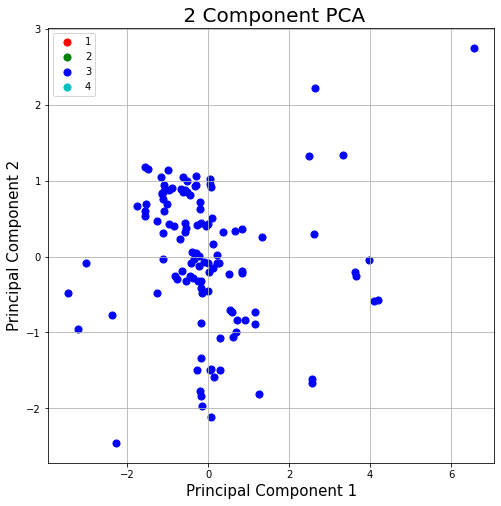

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title(' 2 Component PCA', fontsize = 20)

targets = [1, 2, 3, 4,]
colors = ['r', 'g', 'b', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['Jenis Industri'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'PCA_1']
             ,final_df.loc[indicesToKeep, 'PCA_2']
             ,c = color
             , s = 50)
ax.legend(targets)
ax.grid()

MODELLING

In [ ]:
# Choosing feature for modelling
X = final_df.iloc[:, :-1].values

In [ ]:
# Build the model
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(x) 
    wcss.append(kmeans.inertia_)

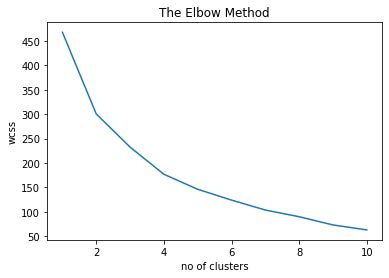

In [ ]:
# Looking for optimum K with Elbow Method
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
# Fitting the model
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=42)
y_kmeans= kmeansmodel.fit_predict(X)
centroids = kmeansmodel.cluster_centers_

y_kmeans

array([0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 1, 1,
       1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 3, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1], dtype=int32)

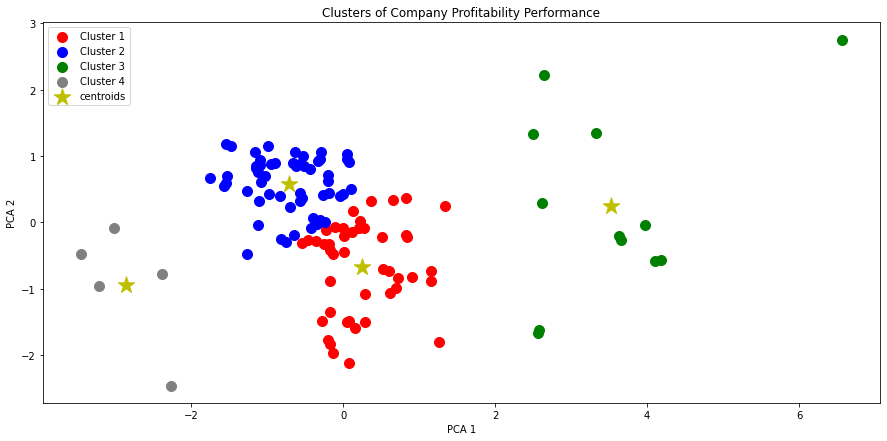

In [ ]:
# Visualization for clustering result
plt.figure(figsize=(15,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'grey', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
#plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'purple', label = 'Cluster 6')
# plot for centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='y', label='centroids')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label = 'centroids')
plt.title('Clusters of Company Profitability Performance')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Evaluating Clustering Models
from sklearn.metrics import silhouette_score
score = silhouette_score(X, kmeansmodel.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.431


In [ ]:
# Making data frame for clutering result
y_label = pd.DataFrame(y_kmeans)
y_label

,0
0,0
1,0
2,0
3,0
4,0
...,...
112,0
113,0
114,1
115,1


In [ ]:
# Import to CSV
from google.colab import files

y_label.to_csv('#2.csv', encoding = 'utf-8-sig') 
files.download('#2.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>